In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

u'/Users/christophereppig/DSI_week3'

In [17]:
titanic = pd.read_csv('../Datasets/titanic_test.csv')

In [18]:
sex_dummy = pd.get_dummies(titanic['Sex'])
titanic = pd.concat([titanic, sex_dummy], axis=1)

In [19]:
embark_dummy = pd.get_dummies(titanic['Embarked'], prefix='embark')
titanic = pd.concat([titanic, embark_dummy], axis=1)

In [20]:
class_dummy = pd.get_dummies(titanic['Pclass'])
class_dummy.columns = ['Class1', 'Class2', 'Class3']
titanic = pd.concat([titanic, class_dummy], axis=1)

In [21]:
titanic['logFare'] = titanic['Fare'].apply(lambda x : np.log(x) if x > 0 else 0)
titanic['isChild'] = titanic['Age'].apply(lambda x: 1 if x < 14 else 0)
titanic['isElderly'] = titanic['Age'].apply(lambda x: 1 if x >= 60 else 0)
titanic['noParch'] = titanic['Parch'].apply(lambda x: 1 if x==0 else 0)
titanic['noSibsp'] = titanic['SibSp'].apply(lambda x: 1 if x==0 else 0)

In [30]:
titanic.columns

Index([u'index', u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex',
       u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked', u'female',
       u'male', u'embark_C', u'embark_Q', u'embark_S', u'Class1', u'Class2',
       u'Class3', u'logFare', u'isChild', u'isElderly', u'noParch',
       u'noSibsp'],
      dtype='object')

In [24]:
del titanic['Cabin']

{'boxes': [<matplotlib.lines.Line2D at 0x11a543790>],
 'caps': [<matplotlib.lines.Line2D at 0x11a55e5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a56a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a56a290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x114a21850>,
  <matplotlib.lines.Line2D at 0x11a543f50>]}

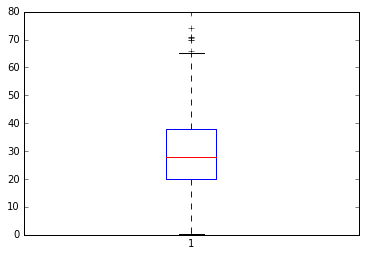

In [35]:
plt.boxplot(titanic['Age'])

In [31]:
titanic_working = titanic['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'embark_C', 'embark_Q', 'Class1', 'Class2', 'logFare', 'isChild', 'isElderly', 'noParch', 'noSibsp']

KeyError: ('Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'embark_C', 'embark_Q', 'Class1', 'Class2', 'logFare', 'isChild', 'isElderly', 'noParch', 'noSibsp')

In [25]:
print titanic.shape
titanic.dropna(inplace=True)
print titanic.shape

(891, 25)
(712, 25)


In [14]:
titanic.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Class2,Class3,logFare,isChild,isElderly,noParch,noSibsp,embark_C,embark_Q,embark_S
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,...,0.0,1.0,1.981001,0,0,1,0,0.0,0.0,1.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,...,0.0,0.0,4.266662,0,0,1,0,1.0,0.0,0.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,...,0.0,1.0,2.070022,0,0,1,1,0.0,0.0,1.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,...,0.0,0.0,3.972177,0,0,1,0,0.0,0.0,1.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,...,0.0,1.0,2.085672,0,0,1,1,0.0,0.0,1.0


In [27]:
y = titanic['Survived']

In [28]:
kbest = SelectKBest(k=5)

In [29]:
kbest5 = kbest.fit_transform(titanic, y)

ValueError: could not convert string to float: Q